## **Import Package**

In [ ]:
#menghilangkan warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **Load Dataset**

In [ ]:
#Read data
df = pd.read_csv('/content/drive/MyDrive/PZIB 2023/Tugas Data Analyst/Tugas 7-8/train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#Mencari informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##**Menentukan Variabel Dataset**

###**Variabel Numerical terdiri dari:**


1.   Age
2.   SibSp
1.   Parch
2.   Fare

###**Variabel Categorical terdiri dari:**


1.   Survived
2.   Pclass
1.   Name
2.   Sex
1.   Ticket
2.   Cabin
1.   Embarked

###**Variabel Target**
Target variabel dari permasalahan machine learning pada dataset titanic ini adalah variabel Survived yang bertipe data kategori dimana nilai 0 merepresentasikan bahwa passenger tidak selamat dan nilai 1 merepresentasikan bahwa passenger selamat. Akan dilakukan visualisasi data untuk penyelesaian machine learning dengan menggunakan target variabel dan juga fitur lain yang terdapat pada dataset seperti 'Age', 'Pclass', 'Sex', dan lain-lain















## **Missing Values Handling**

In [ ]:
#Mencari jumlah missing values pada dataframe
data_missing_value = df.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,Cabin,687,77.10
1,Age,177,19.87
2,Embarked,2,0.22


In [ ]:
#HANDLING MISSING VALUES
#Hapus baris dari fitur yang memiliki nilai yang hilang pada variabel Embarked
df = df.dropna(subset='Embarked')

#Hapus kolom Cabin karena tidak akan digunakan
df = df.drop(['Cabin'], axis=1)

#Mengubah missing values pada variabel Age dengan nilai mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
#cek apakah missing values sudah tidak ada
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## **Membagi variabel numerical dan categorical**

In [ ]:
#membuat dataframe berisi semua variabel numerical
df_num = df[['Age', 'SibSp','Parch','Fare']]
df_num.head()

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


In [ ]:
#membuat dataframe berisi semua variabel categorical
df_cat = df[['Survived', 'Pclass','Name','Sex','Ticket','Embarked']]
df_cat.head()

,Survived,Pclass,Name,Sex,Ticket,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,1,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,0,3,"Allen, Mr. William Henry",male,373450,S


## **Anomalies and Outlier Handling**

In [ ]:
#cek nilai outliner semua variabel pada dataframe df_num
def find_outlier(data):
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    
    iqr = q3 - q1
    min_iqr = q1 - (1.5 * iqr)
    max_iqr = q3 + (1.5 * iqr)
    
    outlier = []
    for i in data:
        if (i < min_iqr) or (i > max_iqr):
            outlier.append(i)
    
    return outlier

def show_outlier(data, variables):
    return pd.DataFrame({
        "outliers": [len(j) for j in [find_outlier(data[i]) for i in variables]],
        "percentage": np.array([len(j) for j in [find_outlier(data[i]) for i in variables]]) / len(data) * 100
    }).set_index([variables]).sort_values("outliers", ascending=False)

show_outlier(df_num, df_num.columns)

,outliers,percentage
Parch,213,23.959505
Fare,114,12.823397
Age,65,7.311586
SibSp,46,5.174353


In [ ]:
#Handling missing values pada variabel Fare dengan log transformation
df['log_Fare'] = np.log(df['Fare']+1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,log_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,2.202765


Text(0.5, 0, '')

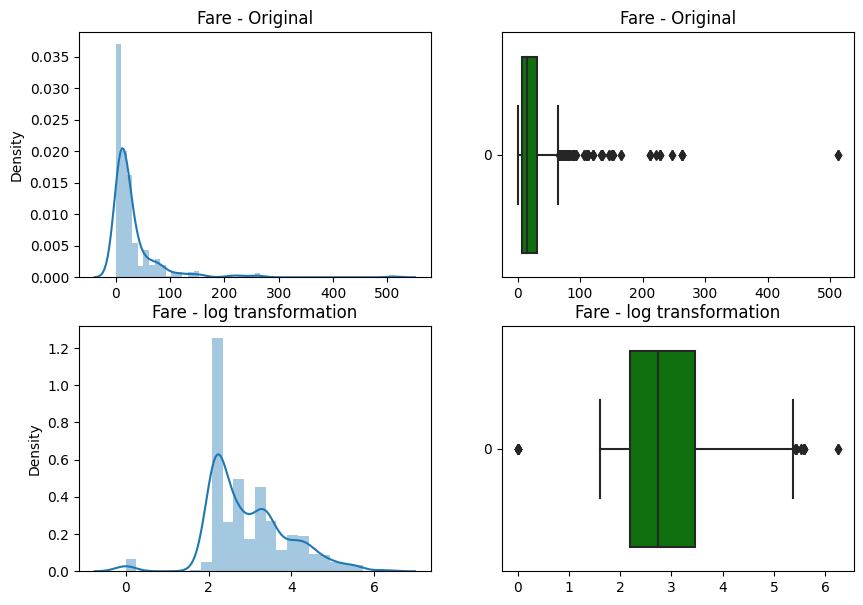

In [ ]:
#Visualisasi untuk melihat perbedaan pada variabel Fare sebelum dan sesudah transformasi log
f,ax = plt.subplots(2,2,figsize=(10,7))

g = sns.distplot(df['Fare'],kde=True, ax=ax[0,0])
ax[0,0].set_title('Fare - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(df['Fare'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('Fare - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log(df['Fare']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('Fare - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log(df['Fare']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('Fare - log transformation')
ax[1,1].set_xlabel('')

In [ ]:
#import package
from scipy import stats

<Axes: >

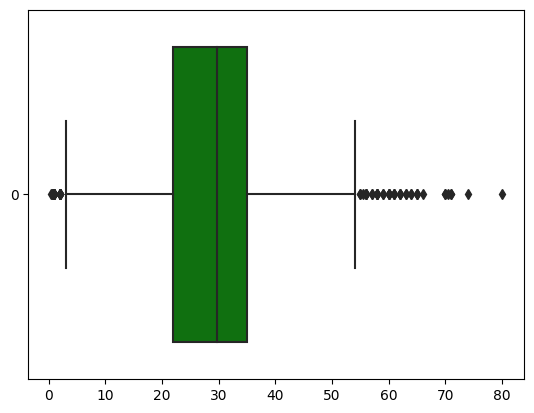

In [ ]:
#Melihat distribusi data pada variabel Age (cek apakah ada outlier)
sns.boxplot(df['Age'],color='green',orient='h')

In [ ]:
#Handling outlier pada variabel Age menggunakan zscore
print('Jumlah baris sebelum handling outlier pada kolom Age:', len(df))
df['Age_zscore'] = abs(stats.zscore(df['Age']))
df = df[df['Age_zscore'] < 3]
print(f'Jumlah baris setelah memfilter outlier:', len(df))

Jumlah baris sebelum handling outlier pada kolom Age: 889
Jumlah baris setelah memfilter outlier: 882


<Axes: >

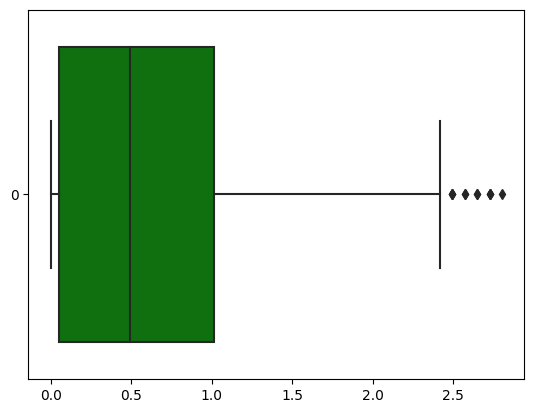

In [ ]:
#Melihat distribusi data pada variabel Age setelah dilakukan handling
sns.boxplot(df['Age_zscore'],color='green',orient='h')

#**Visualisasi Data**

##**Barplot**

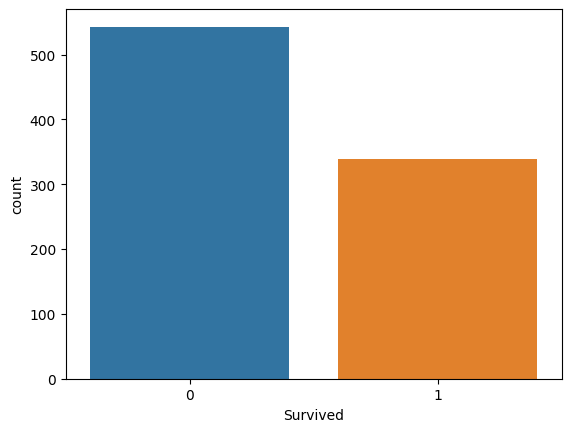

In [ ]:
#Untuk mengetahui perbandingan jumlah passenger yang selamat dan tidak selamat
sns.countplot(x=df['Survived'])

#change figure size sns
sns.set(rc={'figure.figsize':(12,10)})

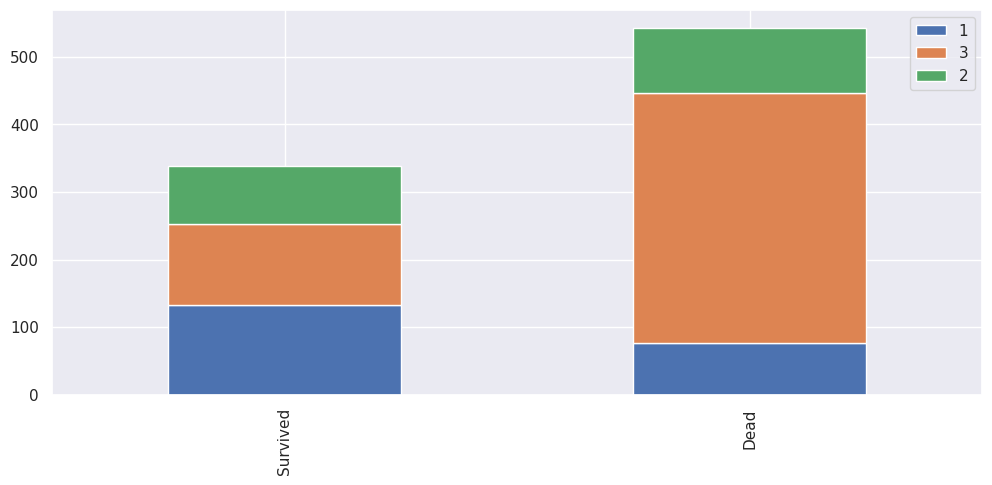

In [ ]:
#Mencari perbandingan jumlah passengers yang survived dan dead menurut variabel tertentu (vertikal orientation)
def bar_chart(feature):
  Survived = df[df['Survived']==1][feature].value_counts()
  Dead = df[df['Survived']==0][feature].value_counts()
  df_bar = pd.DataFrame([Survived,Dead])
  df_bar.index = ['Survived','Dead']
  df_bar.plot(kind='bar', stacked=True, figsize=(12,5))

#Mencari perbandingan passengers yang survived dan dead menurut variabel Pclass
bar_chart('Pclass')

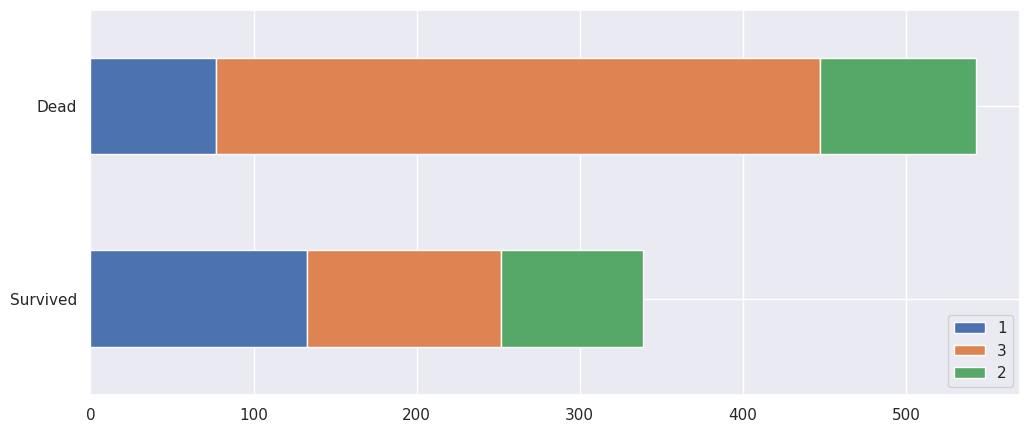

In [ ]:
#Mencari perbandingan jumlah passengers yang survived dan dead menurut variabel tertentu (horizontal orientation)
def bar_chart(feature):
  Survived = df[df['Survived']==1][feature].value_counts()
  Dead = df[df['Survived']==0][feature].value_counts()
  df_bar = pd.DataFrame([Survived,Dead])
  df_bar.index = ['Survived','Dead']
  df_bar.plot(kind='barh', stacked=True, figsize=(12,5))

bar_chart('Pclass')

Berdasarkan output terlihat bahwa passenger yang survived lebih banyak berasal dari 1st class dibandingkan dengan kelas lainnya. Sementara itu, untuk passenger yang meninggal lebih banyak berasal dari 2nd class dibandingkan dengan kelas lainnya.

##**Distplot**

<Axes: xlabel='Fare', ylabel='Count'>

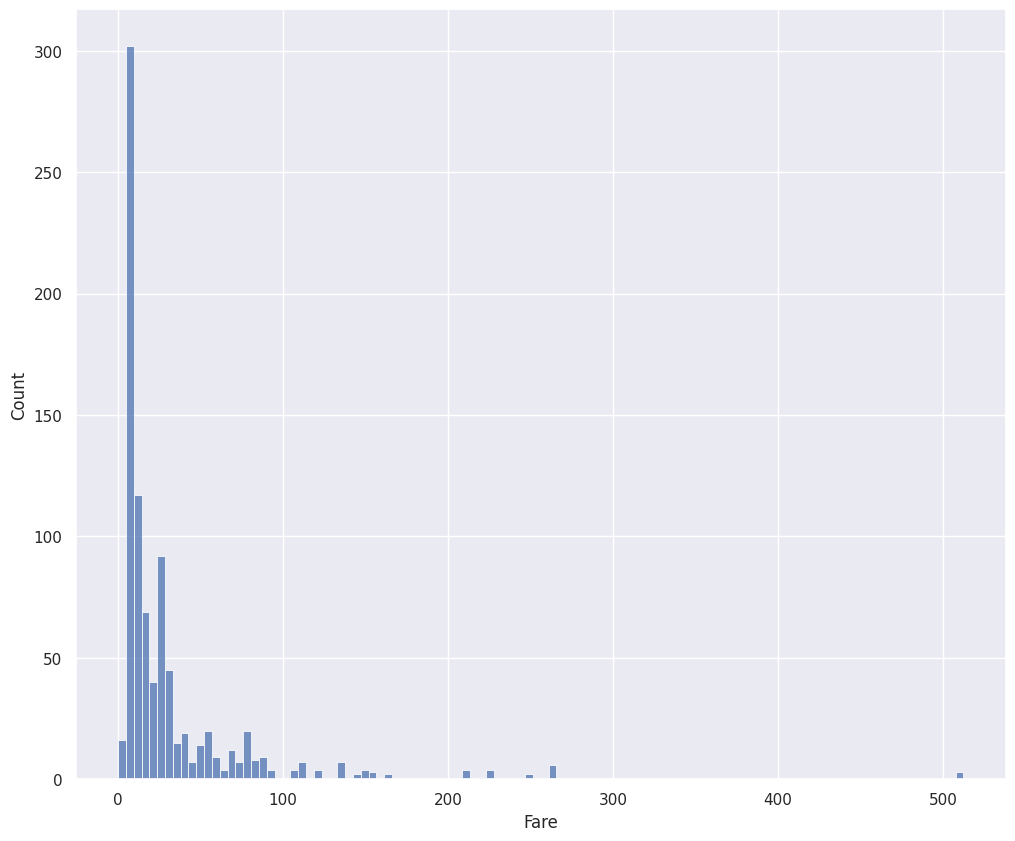

In [ ]:
#Distplot untuk variabel Fare
sns.histplot(data=df, x='Fare')

Berdasarkan output, terlihat bahwa kebanyakan tiket terjual dengan harga 0-50 dollar. Namun, pada distribution plot tersebut terlihat masih ada banyak outlier pada data. 

Dikarenakan adanya outlier, transformasi log dapat digunakan untuk mengompresi rentang nilai, membuatnya lebih mudah untuk mengamati pola dan tren dalam data, terlepas dari efek outlier.

<Axes: xlabel='log_Fare', ylabel='Count'>

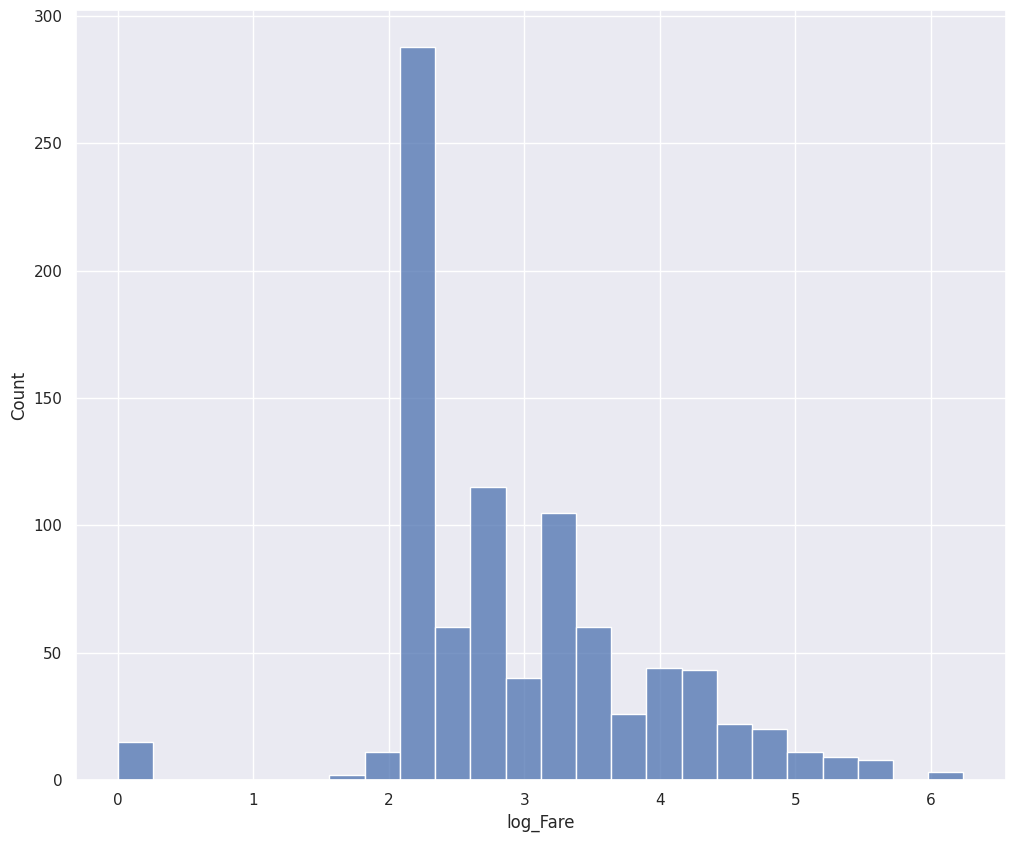

In [ ]:
#Distplot variabel Fare setelah dilakukan log transformation
sns.histplot(data=df, x='log_Fare')

##**Boxplot**

<Axes: xlabel='Sex', ylabel='Age'>

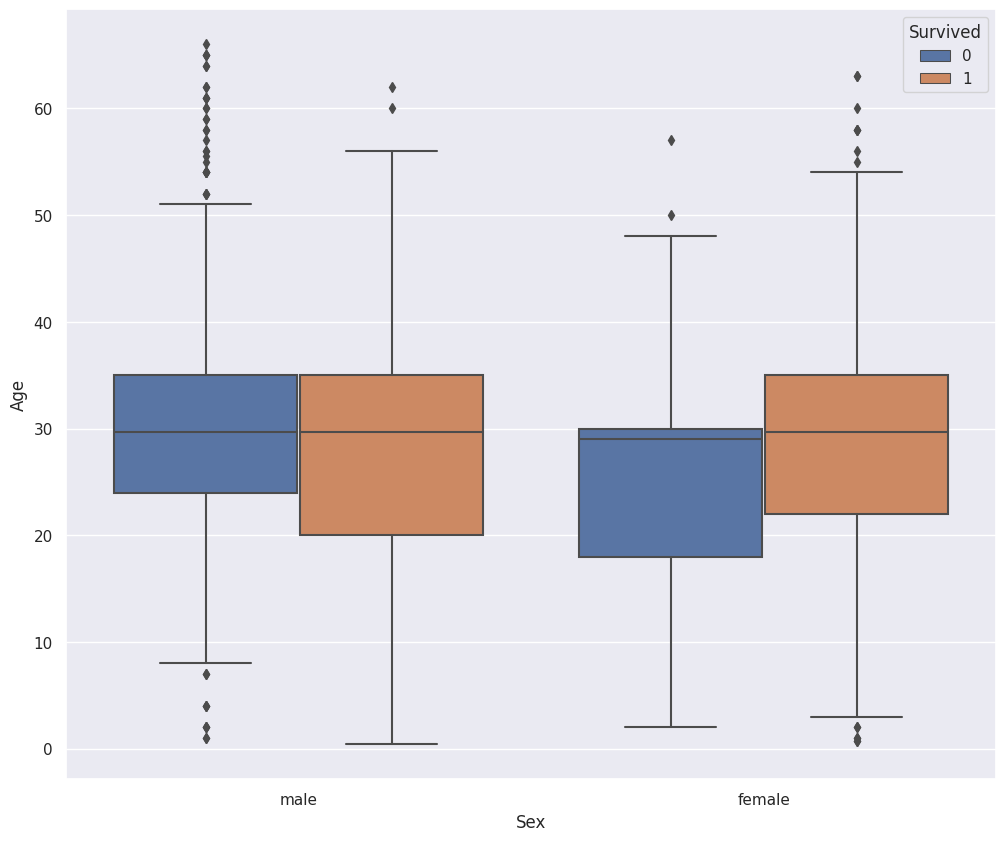

In [ ]:
sns.boxplot(data=df, x='Sex', y='Age', hue='Survived')

Berdasarkan output diatas, terlihat bahwa diantara penumpang laki-laki, rata-rata lebih banyak orang yang lebih muda yang selamat dibandingkan dengan orang yang lebih tua. Lalu, terlihat juga bahwa variasi usia penumpang wanita yang meninggal jauh lebih besar daripada usia penumpang wanita yang selamat.

##**Scatterplot**

<Axes: xlabel='Age', ylabel='Fare'>

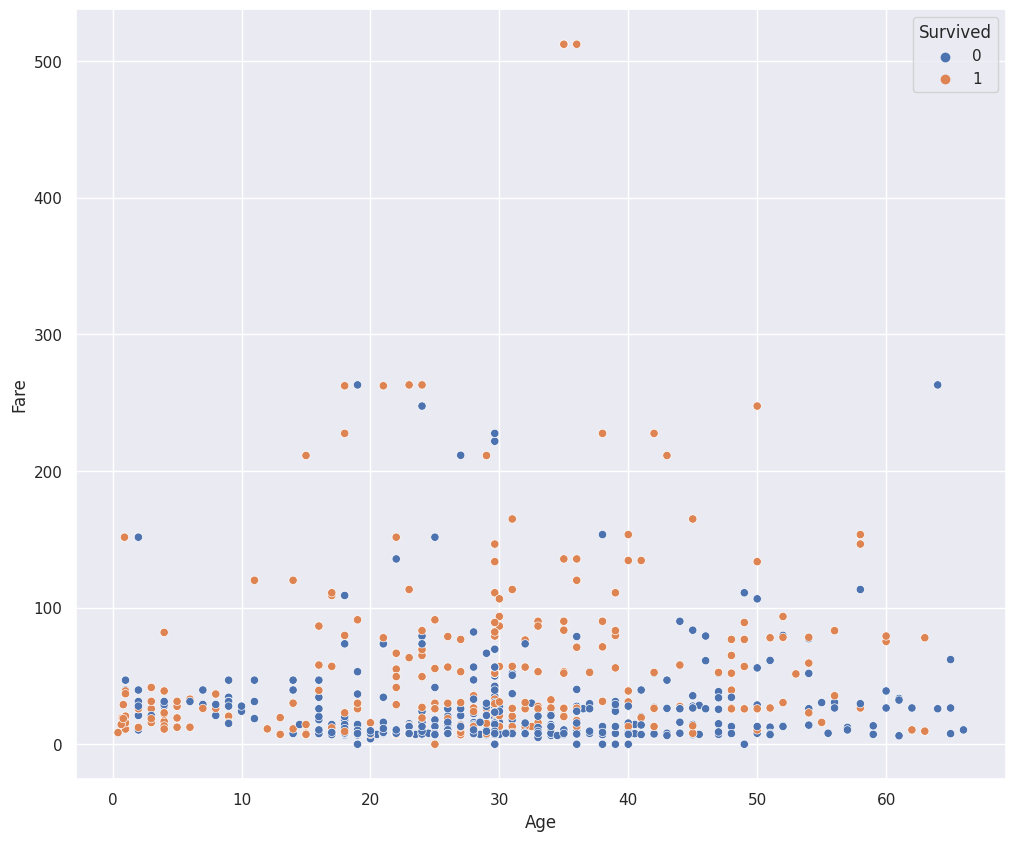

In [ ]:
#Melihat hubungan antara variabel Age, Fare, dan Survived
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')

##**Pie Chart**

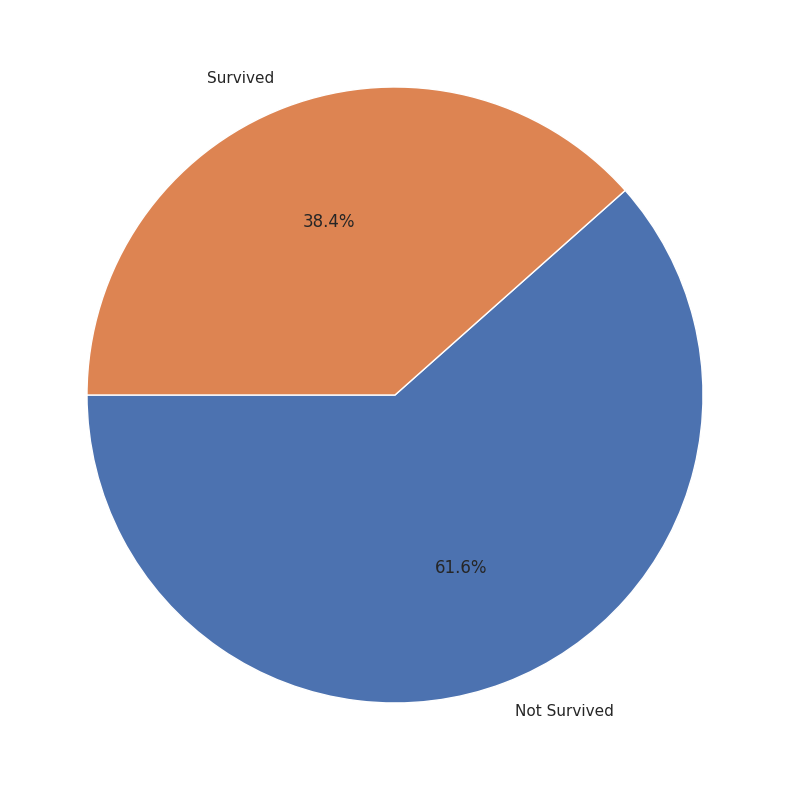

In [ ]:
#Untuk mengetahui persentase passenger yang survived dan tidak survived
df['Survived'] = df.Survived.map({0: 'Not Survived', 1: 'Survived'})
grouped_data=df.groupby('Survived').count()['PassengerId'].reset_index()
grouped_data=grouped_data.rename(columns={'Survived':'Survived', "PassengerId": "Total"})

fig1, ax1 = plt.subplots()
ax1.pie(grouped_data['Total'], labels=grouped_data['Survived'], autopct='%1.1f%%', startangle=180)

plt.show()

Berdasarkan output diperoleh bahwa persentase passenger yang tidak selamat adalah sebesar 61,6% dimana nilai tersebut lebih besar dibandingkan dengan persentase passenger yang selamat yaitu sebesar 38,4%.

